In [1]:
#Pemprosesan Rekomendasi Sekolah dan Pemetaan Folium

import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'C:/Users/User/Documents/Berkas Fikar/Skripsi Fikar/Database/data_hasil_peningkatan_dbscan.csv'
data = pd.read_csv(file_path)

In [3]:
filtered_data = data[(data['siswa_total'] > data['siswa_total'].mean()) &
                     (data['skor_akreditasi'] < data['skor_akreditasi'].mean()) &
                     (data['jumlah_ruangan'] < data['jumlah_ruangan'].mean()) &
                     (data['wilayah_total'] < data['wilayah_total'].mean()) &
                     (data['jumlah_guru'] < data['jumlah_guru'].mean()) &
                     (data['staf_total'] < data['staf_total'].mean()) &
                     (data['daya_listrik'] < data['daya_listrik'].mean())]

In [4]:
filtered_data = filtered_data.reset_index(drop=True)
filtered_data['ranking'] = range(1, len(filtered_data) + 1)

In [5]:
rekomendasi_sekolah = filtered_data[['ranking', 'Nama Sekolah', 'siswa_total', 'skor_akreditasi', 
                                     'jumlah_ruangan', 'wilayah_total', 'jumlah_guru', 
                                     'staf_total', 'daya_listrik', 'Lintang', 'Bujur' ]]

In [6]:
rekomendasi_sekolah.to_csv('Rekomendasi_Sekolah_Yang_Paling_Butuh_BOP.csv', index=False)

In [17]:
m = folium.Map(location=[filtered_data['Lintang'].mean(), filtered_data['Bujur'].mean()], zoom_start=8)
marker_cluster = MarkerCluster().add_to(m)

In [18]:
for idx, row in filtered_data.iterrows():
    popup_info = (f"Urutan Rekomendasi: {row['ranking']}<br>"
                  f"Nama: {row['Nama Sekolah']}<br>"
                  f"Jumlah Siswa: {row['siswa_total']}<br>"
                  f"Skor Akreditasi: {row['skor_akreditasi']}<br>"
                  f"Jumlah Ruangan: {row['jumlah_ruangan']}<br>"
                  f"Luas Wilayah: {row['wilayah_total']}<br>"
                  f"Jumlah Guru: {row['jumlah_guru']}<br>"
                  f"Jumlah Staf: {row['staf_total']}<br>"
                  f"Daya Listrik: {row['daya_listrik']}")
    folium.Marker(
        location=[row['Lintang'], row['Bujur']],
        popup=popup_info,
        icon=folium.Icon(color='red')
    ).add_to(marker_cluster)

In [19]:
m.save('Peta_Rekomendasi_Sekolah_BOP_FIX.html')

print("Peta interaktif tersimpan sebagai Peta_Rekomendasi_Sekolah_BOP.html")

Peta interaktif tersimpan sebagai Peta_Rekomendasi_Sekolah_BOP.html


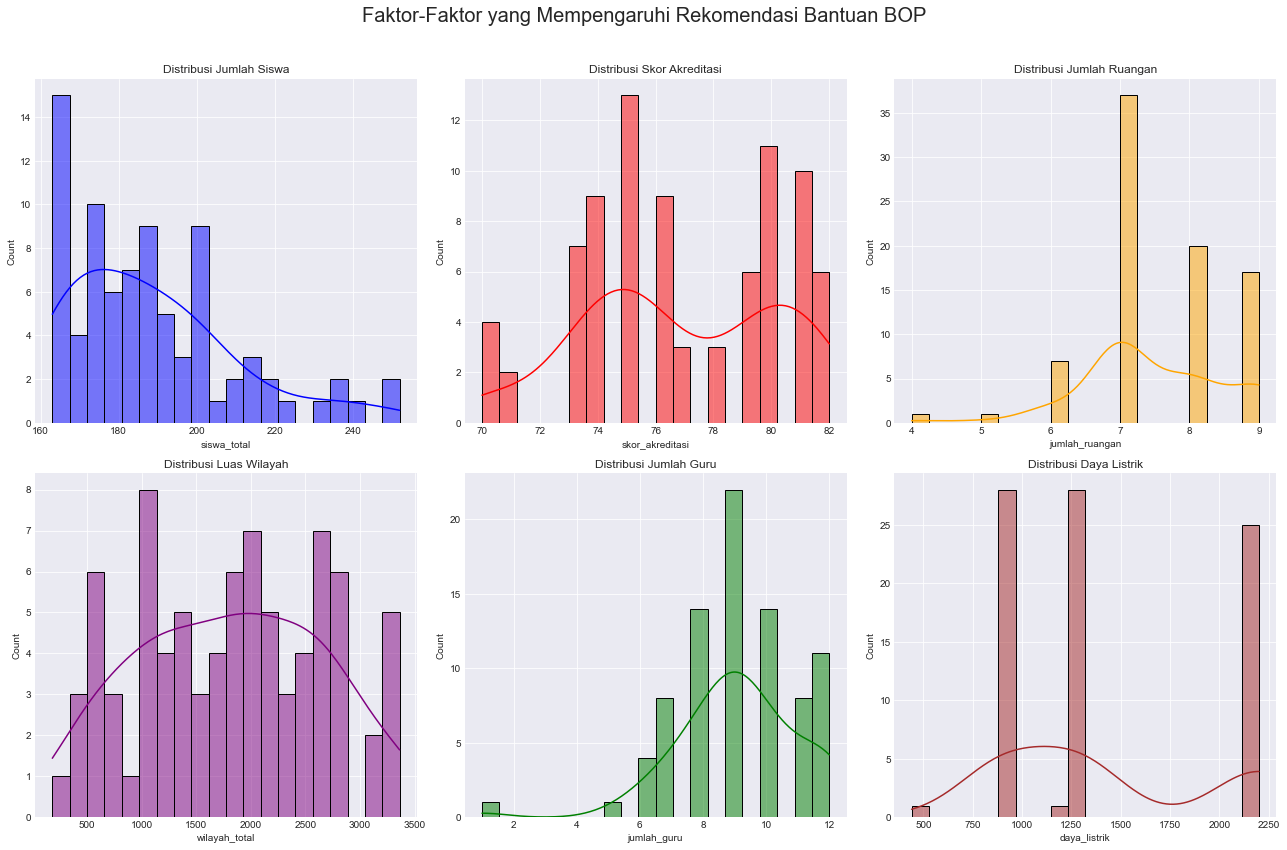

In [34]:
# Visualisasi
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Faktor-Faktor yang Mempengaruhi Rekomendasi Bantuan BOP', fontsize=20)

# Distribusi jumlah siswa
sns.histplot(filtered_data['siswa_total'], bins=20, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribusi Jumlah Siswa')

# Distribusi skor akreditasi
sns.histplot(filtered_data['skor_akreditasi'], bins=20, kde=True, ax=axes[0, 1], color='red')
axes[0, 1].set_title('Distribusi Skor Akreditasi')

# Distribusi jumlah ruangan
sns.histplot(filtered_data['jumlah_ruangan'], bins=20, kde=True, ax=axes[0, 2], color='orange')
axes[0, 2].set_title('Distribusi Jumlah Ruangan')

# Distribusi luas wilayah
sns.histplot(filtered_data['wilayah_total'], bins=20, kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Distribusi Luas Wilayah')

# Distribusi jumlah guru
sns.histplot(filtered_data['jumlah_guru'], bins=20, kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Distribusi Jumlah Guru')

# Distribusi daya listrik
sns.histplot(filtered_data['daya_listrik'], bins=20, kde=True, ax=axes[1, 2], color='brown')
axes[1, 2].set_title('Distribusi Daya Listrik')

# Tata letak
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [35]:
plt.savefig('grafk_BOP.png')

<Figure size 432x288 with 0 Axes>

In [24]:
print("\nDaftar Rekomendasi Sekolah untuk Bantuan BOP dengan Urutan:")
print(rekomendasi_sekolah)


Daftar Rekomendasi Sekolah untuk Bantuan BOP dengan Urutan:
    ranking                         Nama Sekolah  siswa_total  \
0         1      UPT SPF SD INPRES PAGANDONGAN 2          232   
1         2                   SD IT IMAM SYAFI I          167   
2         3               SD MUHAMMADIYAH MIMBAR          220   
3         4           UPT SPF SD INPRES BATUA II          180   
4         5     UPT SPF SD INPRES TELLO BARU III          183   
..      ...                                  ...          ...   
78       79               SMPIT UMAR BIN KHATTAB          172   
79       80      SMP ISLAM DARUL ISTIQAMAH LOEHA          215   
80       81             SMP CITRA MULIA MAKASSAR          163   
81       82             SMAS TRI DHARMA MAKASSAR          164   
82       83  SMAS PESANTREN PUTRI YATAMA MANDIRI          169   

    skor_akreditasi  jumlah_ruangan  wilayah_total  jumlah_guru  staf_total  \
0                82               7           2800           11           2   


In [33]:
plt.savefig('grafik_BOP.png')

<Figure size 432x288 with 0 Axes>